# Project: Wrangling and Analyze Data

## Table of Contents

* [Introduction](#introduction)
* [Data Gathering](#gathering)
* [Assessing Data](#assessing)
* [Cleaning Data](#cleaning)
* [Storing Data](#storing)
* [Analyzing and Visualization](#analyzing)
* [References](#references)

## Introduction <a id='introduction'></a>

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The data comes in two files ie. `twitter_archive_enhanced.csv` and `image_predictions.tsv`. It is also required to acquire retweet count and favorite count data from Twitter API. The data is also messy but contains valuable information about various dogs which one can gather insights after cleaning.

### Importing Packages

In [23]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import requests
import os
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.2)

## Data Gathering <a id='gathering'></a>

1. Twitter archive data (twitter-archive-enhanced.csv)

In [24]:
# loading twitter-archive-enhanced.csv as a dataframe
archive_df = pd.read_csv('data\\twitter-archive-enhanced.csv')

2. Tweet image prediction data (image-predictions.tsv)

In [25]:
# downloading image-predictions.tsv programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(r.content)

In [26]:
# loading image-predictions.tsv as a dataframe
image_pred_df = pd.read_csv('data\image-predictions.tsv', sep='\t')

3. Twitter API (tweet_json.txt)

In [27]:
# loading packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from dotenv import load_dotenv

load_dotenv()

# keys
consumer_key = os.getenv("CONSUMER_KEY")
consumer_secret = os.getenv("CONSUMER_SECRET")
access_token = os.getenv("ACCESS_KEY")
access_secret = os.getenv("ACCESS_SECRET")

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('data\\tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [28]:
# loading tweet_json.txt as a dataframe
with open('data\\tweet_json.txt') as file:
    api_df = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing Data <a id='assessing'></a>

#### Visual Assessment

In [29]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [30]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [31]:
api_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


#### Programmatic Assessment

In [32]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,None,None,None,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None
1555,688894073864884227,NaN,NaN,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hamrick. He's covered in corn flakes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688894073...,7,10,Hamrick,None,None,pupper,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
1077,739544079319588864,NaN,NaN,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None


In [34]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
sum(archive_df.duplicated())

0

In [36]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
sum(image_pred_df.jpg_url.duplicated())

66

In [39]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [40]:
api_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.327000e+03,2.327000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2327.000000,2327.000000,2195.0,2195.0,2.600000e+01,2.600000e+01
mean,7.417930e+17,7.417930e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2458.465406,7021.655350,0.0,0.0,8.113972e+17,8.113972e+17
std,6.820795e+16,6.820795e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4163.146663,10910.242305,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.781394e+17,6.781394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,492.500000,1221.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.178418e+17,7.178418e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1144.000000,3036.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986547e+17,7.986547e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2844.500000,8559.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,70329.000000,144138.000000,0.0,0.0,8.860534e+17,8.860534e+17


### Quality issues

#### Archive data

1. Data contains replies and retweets instead of orginal tweets

2. The columns `doggo`, `floofer`, `pupper` and `puppo` have `None` representing missing values

3. `timestamp` is object data type instead of datetime

4. `text` has links in them

4. The `rating_numerator` has incorrect values and datatypes

5. The `rating_denominator` has incorrect values

6. The `source` column values are closed within `<a>` tags

7. Some columns are not necessary for analysis


#### Image predictions data

1. There are duplicated image url's in `jpg_url`

### Tidiness issues

#### Archive data

1. The columns `doggo`, `floofer`, `pupper` and `puppo` should be in one column i.e `dog_stage`

#### Image predictions data

1. The columns `p1` `p1_conf` `p1_dog` `p2` `p2_conf` `p2_dog` `p3` `p3_conf` and `p3_dog` should be in two columns i.e `breed` and `conf`

#### General
1. All datasets should be combined into one dataset

## Cleaning Data <a id='cleaning'></a>

In [41]:
# Make copies of original pieces of data
archive_cleaned_copy = archive_df.copy()
image_cleaned_copy = image_pred_df.copy()
api_cleaned_copy = api_df.copy()

### Quality issues

#### Issue #1: **Archive data** - Data contains replies and retweets instead of orginal tweets

##### Define: Only original tweets are required in the data analysis. Rows that have `in_reply_to_status_id` and `retweeted_status_id` values have to be dropped.

##### Code

In [42]:
archive_cleaned_copy = archive_cleaned_copy[archive_cleaned_copy['in_reply_to_status_id'].isnull() &\
                       archive_cleaned_copy['retweeted_status_id'].isnull()]

##### Test

In [43]:
archive_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Issue #2: **Archive data** - The columns `doggo`, `floofer`, `pupper` and `puppo` have `None` representing missing values

##### Define: The dog stage columns have None for missing values, hence not being counted as null values. This is incorrect for representing missing values hence have to be corrected.

##### Code

In [44]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

for col in cols:
    archive_cleaned_copy[col] = archive_cleaned_copy[col].replace('None', np.nan)

##### Test

In [45]:
archive_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       83 no

#### Issue #3: **Archive data** - `timestamp` is object data type instead of datetime

##### Define: In order to work with dates and time, the dataset has to have the correct datatype for `timestamp`.

##### Code

In [46]:
archive_cleaned_copy['timestamp'] = pd.to_datetime(archive_cleaned_copy['timestamp'])

##### Test

In [47]:
archive_cleaned_copy.timestamp.dtype

datetime64[ns, UTC]

#### Issue #4: `text` has links in them

##### Define: The `text` column values has links to the tweets. The links have to be removed from them since they already have their column.

##### Code

In [48]:
archive_cleaned_copy['text'] = archive_cleaned_copy.text.str.replace('(https?://.*)', '', regex=True)

##### Test

In [49]:
archive_cleaned_copy.text.sample(10)

1325    This is Dexter. He's a shy pup. Doesn't bark m...
1481    This is Sadie and her 2 pups Shebang &amp; Ruf...
1878    This is a fluffy albino Bacardi Columbia mix. ...
1278    This is Lucy. She doesn't understand fetch. 8/...
1802    This is Tyrus. He's a Speckled Centennial Tico...
781     This girl straight up rejected a guy because h...
1888    Bedazzled pup here. Fashionable af. Super yell...
2103    This is Bloo. He's a Westminster Cîroc. Doesn'...
877     This is Wishes. He has the day off. Daily stru...
2205             This is Churlie. He likes bagels. 10/10 
Name: text, dtype: object

#### Issue #5: **Archive data** - The `rating_numerator` has incorrect values and datatypes

##### Define: While visually assessing the data, there are some ratings in the `text` column that are floats and captured incorrectly. The `rating_numerator` has to be extracted from the `text` again.

##### Code

In [50]:
archive_cleaned_copy['rating_numerator'] = archive_cleaned_copy['text'].str\
                                           .extract("(\d+[0-9.]+(?=\/)(?!.*\d+[0-9.]+\/)|[0-9]+(?=\/)(?!.*\d+[0-9.]+\/))")

archive_cleaned_copy['rating_numerator'] = archive_cleaned_copy.rating_numerator.astype('float')

##### Test

In [51]:
archive_cleaned_copy.rating_numerator.value_counts()

12.00      486
10.00      437
11.00      416
13.00      289
9.00       152
8.00        97
7.00        51
14.00       39
6.00        32
5.00        32
3.00        19
4.00        14
2.00         9
1.00         5
11.26        1
80.00        1
144.00       1
88.00        1
121.00       1
44.00        1
60.00        1
45.00        1
1776.00      1
99.00        1
204.00       1
13.50        1
165.00       1
11.27        1
9.75         1
24.00        1
84.00        1
0.00         1
420.00       1
Name: rating_numerator, dtype: int64

#### Issue #6: **Archive data** - The `rating_denominator` has incorrect values. Some common denotations like 24/7 and 9/11 are affecting both the numerator and denominator hence the values have to be extracted again.

##### Define:

##### Code

In [52]:
archive_cleaned_copy['rating_denominator'] = archive_cleaned_copy['text'].str.extract(r'([^\/][0-9]+(?!.*\/[0-9]+))')

archive_cleaned_copy['rating_denominator'] = archive_cleaned_copy.rating_denominator.astype('float')

In [53]:
archive_cleaned_copy = archive_cleaned_copy[~pd.isnull(archive_cleaned_copy.rating_denominator)]

##### Test

In [54]:
archive_cleaned_copy.rating_denominator.value_counts()

10.0     2084
80.0        2
50.0        2
70.0        1
150.0       1
170.0       1
90.0        1
40.0        1
110.0       1
92.0        1
120.0       1
Name: rating_denominator, dtype: int64

#### Issue #7: **Archive data** - The `source` column values are closed within `<a>` tags

##### Define: Knowing the source of tweets is a valuable insight. The `source` column could be cleaned through extraction of the source from the `<a>` tags and change the data type to categorical.

##### Code

In [55]:
archive_cleaned_copy['source'] = archive_cleaned_copy.source.str.extract('(?<=\>)(.*?)(?=\<)')

archive_cleaned_copy['source'] = archive_cleaned_copy.source.astype('category')

##### Test

In [56]:
archive_cleaned_copy.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

#### Issue #8: **Archive data** - Some columns are not necessary for analysis

##### Define: There are some columns that won't be helful for the analysis. They can be dropped from the dataset.

##### Code

In [57]:
list(archive_cleaned_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [58]:
col_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
            'retweeted_status_timestamp']

archive_cleaned_copy = archive_cleaned_copy.drop(col_list, axis=1)

##### Test

In [59]:
archive_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   int64              
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   category           
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float64            
 6   rating_denominator  2096 non-null   float64            
 7   name                2096 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: category(1), datetime64[ns, UTC

#### Issue #9: **API data** - Some columns are not necessary for analysis

##### Define: There are some columns that won't be helful for the analysis. They can be dropped from the dataset.

##### Code

In [60]:
list(api_cleaned_copy)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

In [61]:
api_cleaned_copy['tweet_id'] = api_cleaned_copy['id']

api_cleaned_copy = api_cleaned_copy[['tweet_id', 'retweet_count', 'favorite_count']]

##### Test

In [62]:
api_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Issue #10: **Image prediction data** - There are duplicated image url's in `jpg_url`

##### Define: Duplicates in the image should be removed to improve quality of the data analyis.

##### Code

In [63]:
image_cleaned_copy = image_cleaned_copy.drop_duplicates('jpg_url')

##### Test

In [64]:
sum(image_cleaned_copy.jpg_url.duplicated())

0

--------------------

### Tidiness

#### Issue #11: **Archive data** - The columns `doggo`, `floofer`, `pupper` and `puppo` should be in one column i.e `dog_stage`

##### Define: When the dog state columns are seperated, it becomes hard to analyze the data. The columns need to be combined into one column.

In [65]:
list(archive_cleaned_copy)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Code

In [66]:
archive_cleaned_copy = pd.melt(archive_cleaned_copy, id_vars=['tweet_id', 'timestamp', 'source', 'text',
                                                     'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                                     var_name='dogs', value_name='dog_stage')

archive_cleaned_copy = archive_cleaned_copy.drop('dogs', axis=1)\
                                           .drop_duplicates('tweet_id')

archive_cleaned_copy['dog_stage'] = archive_cleaned_copy['dog_stage'].astype('category')

##### Test

In [67]:
archive_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   int64              
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   category           
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float64            
 6   rating_denominator  2096 non-null   float64            
 7   name                2096 non-null   object             
 8   dog_stage           83 non-null     category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 135.4+ KB


#### Issue #12: **Image prediction data** - The columns `p1` `p1_conf` `p1_dog` `p2` `p2_conf` `p2_dog` `p3` `p3_conf` and `p3_dog` should be in two columns i.e `breed` and `confidence`

##### Define:

##### Code

In [68]:
# empty list for breed and confidence
breed = []
confidence = []

# a function to get the max confidence level and breed from the dataframe
def breed_confidence(df):
    """
    breed_confidence: function that gets a dataframe with three different confidence levels and breed and returns
    the highest confidence level and the breed predicted

    Args:
        df (pandas dataframe): A dataframe with three levels of prediction
    
    Returns: Lists with the highest confidence level and breed
    """
    if (df['p1_dog'] == True) and (df['p1_conf'] > df['p2_conf']) and (df['p1_conf'] > df['p3_conf']):
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif (df['p2_dog'] == True) and (df['p2_conf'] > df['p1_conf']) and (df['p2_conf'] > df['p3_conf']):
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    else:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])

In [69]:
# applying the function
image_cleaned_copy.apply(breed_confidence, axis=1)

image_cleaned_copy['breed'] = breed
image_cleaned_copy['confidence_level'] = confidence

In [70]:
# dropping unnecessary columns 
columns = ['img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']
image_cleaned_copy = image_cleaned_copy.drop(columns, axis=1)

##### Test

In [71]:
image_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2009 non-null   int64  
 1   jpg_url           2009 non-null   object 
 2   breed             2009 non-null   object 
 3   confidence_level  2009 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


#### Issue #13 **General** - All datasets should be combined into one dataset

##### Define: All datasets should now be merged into one for easy data analysis.

##### Code

In [72]:
twitter_data = archive_cleaned_copy.merge(image_cleaned_copy, on='tweet_id').merge(api_cleaned_copy, on='tweet_id')

##### Test

In [73]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   int64              
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   category           
 3   text                1962 non-null   object             
 4   expanded_urls       1962 non-null   object             
 5   rating_numerator    1962 non-null   float64            
 6   rating_denominator  1962 non-null   float64            
 7   name                1962 non-null   object             
 8   dog_stage           72 non-null     category           
 9   jpg_url             1962 non-null   object             
 10  breed               1962 non-null   object             
 11  confidence_level    1962 non-null   float64            
 12  retweet_count       1962 non-null 

## Storing Data <a id='storing'></a>
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
twitter_data.to_csv('data\\twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data <a id='analyzing'></a>


### Insight One and Visualization - Dog breed social media dominance

In [75]:
twitter_popularity = twitter_data.groupby('breed')['retweet_count', 'favorite_count'].sum()\
                                 .sort_values(by=['retweet_count', 'favorite_count'], ascending=False)

twitter_popularity

C:\Users\Flavian\AppData\Local\Temp\ipykernel_14652\1197472639.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_popularity = twitter_data.groupby('breed')['retweet_count', 'favorite_count'].sum()\


,retweet_count,favorite_count
breed,,
golden_retriever,429605,1544826
Labrador_retriever,300612,981288
Pembroke,242448,934830
Chihuahua,187339,607698
Samoyed,146929,462433
...,...,...
window_screen,100,293
French_horn,85,246
wing,50,202


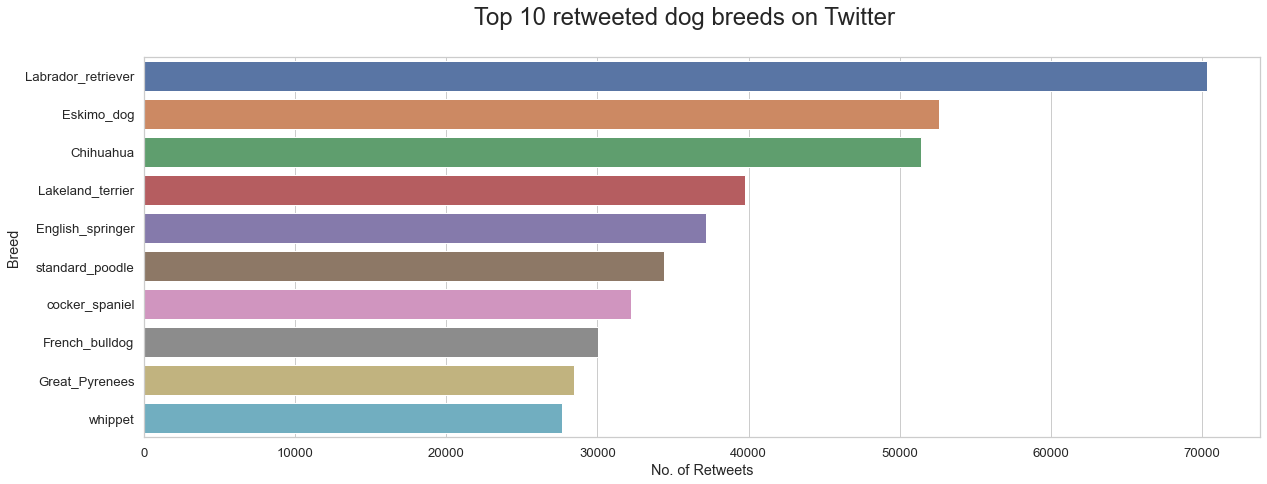

In [76]:
plt.figure(figsize=(20, 7))

sns.barplot(data=twitter_data.nlargest(10, 'retweet_count'), 
            x='retweet_count',
            y='breed')

plt.suptitle("Top 10 retweeted dog breeds on Twitter", fontsize=24)
plt.xlabel("No. of Retweets");
plt.ylabel("Breed");
plt.savefig("visuals\\top_retweeted.png")

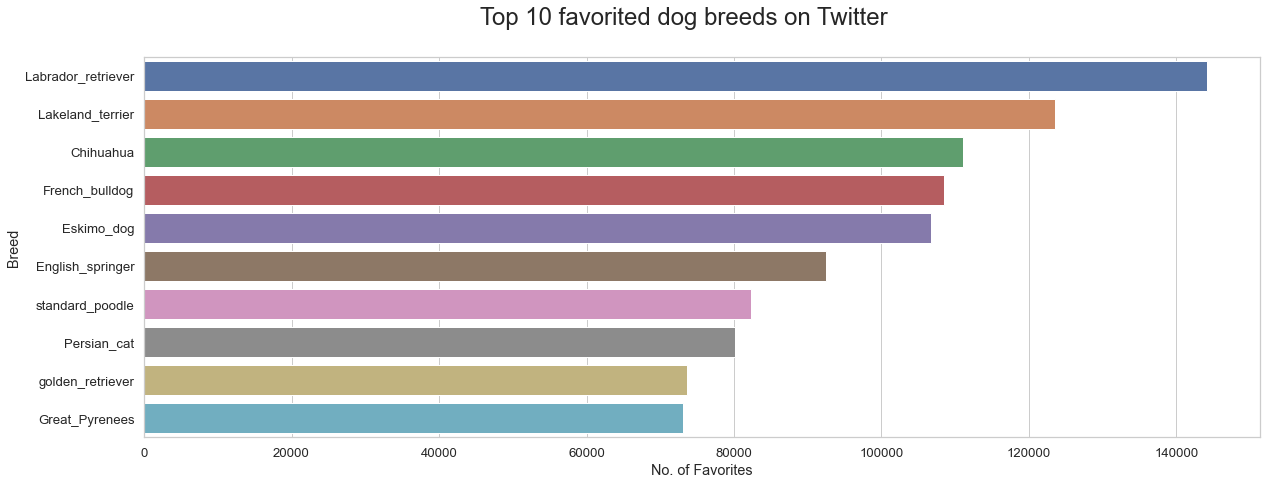

In [77]:
plt.figure(figsize=(20, 7))

sns.barplot(data=twitter_data.nlargest(10, 'favorite_count'), 
            x='favorite_count',
            y='breed')

plt.suptitle("Top 10 favorited dog breeds on Twitter", fontsize=24)
plt.xlabel("No. of Favorites");
plt.ylabel("Breed");
plt.savefig("visuals\\top_favorited.png")

Golden retriever seems to be the most favorited and retweeted breed posts on Twitter.

### Insight Two - The super star: Top rated dog

In [78]:
twitter_data.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence_level,retweet_count,favorite_count
714,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,sunglass,0.050776,2269,4766


<a href="https://twitter.com/dog_rates/status/749981277374128128/photo/1"><img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" alt="The top rated dog: Atticus" style="width: 1080px;"/></a>

Atticus is the top rated dog with a rating of 1776/10!

### Insight Three and Visualization - The main source

In [79]:
tweet_source = twitter_data.groupby('source')['tweet_id'].count()
tweet_source

source
TweetDeck                10
Twitter Web Client       28
Twitter for iPhone     1924
Vine - Make a Scene       0
Name: tweet_id, dtype: int64

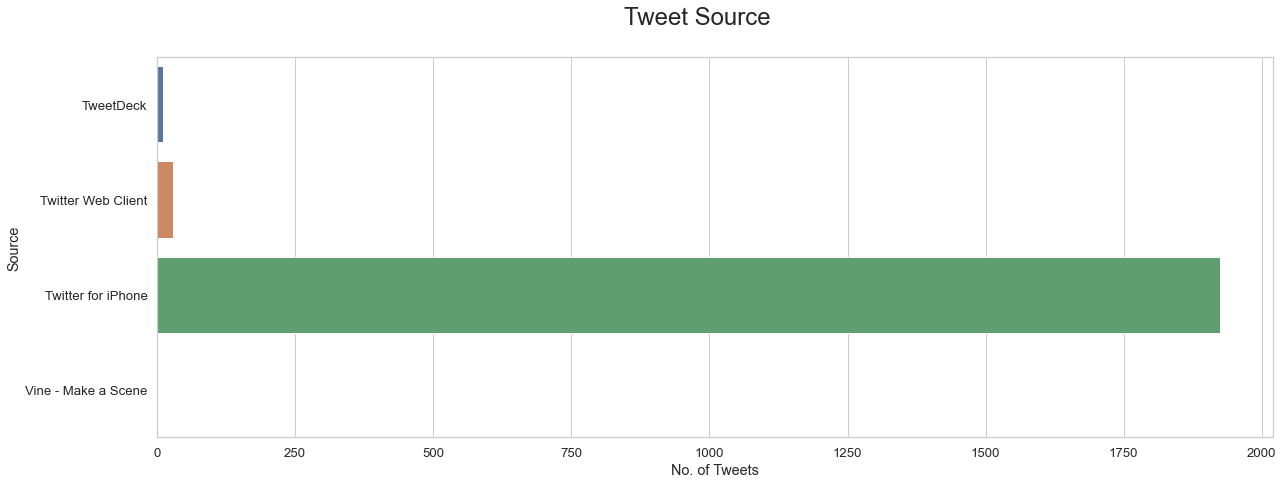

In [80]:
plt.figure(figsize=(20, 7))
sns.countplot(y=twitter_data['source'])
plt.suptitle('Tweet Source', fontsize=24)
plt.xlabel('No. of Tweets');
plt.ylabel('Source');
plt.savefig("visuals\\tweet_source.png")

Tweets are majorly done from an iPhone device.

### Insight Four and Visualization - Tweet frequency according to date

In [81]:
twitter_data = twitter_data.sort_values(by='timestamp')

twitter_data['date'] = twitter_data['timestamp'].dt.date

timeline = twitter_data.groupby(['date'])['tweet_id'].count()

timeline

date
2015-11-15     3
2015-11-16    25
2015-11-17    15
2015-11-18    17
2015-11-19    23
              ..
2017-07-28     2
2017-07-29     2
2017-07-30     1
2017-07-31     1
2017-08-01     2
Name: tweet_id, Length: 595, dtype: int64

In [82]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

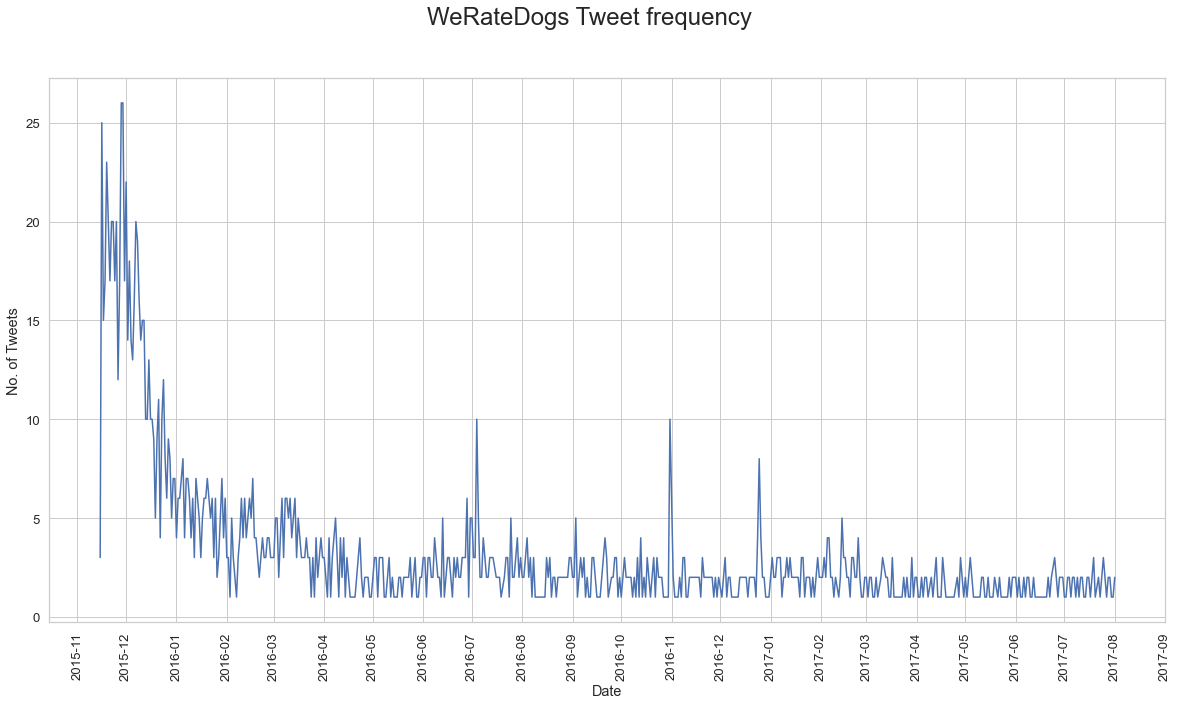

In [83]:

fig, axes = plt.subplots(figsize=(20,10))

sns.lineplot(data=timeline)

plt.suptitle('WeRateDogs Tweet frequency', fontsize=24)

plt.xlabel('Date')
plt.ylabel('No. of Tweets')

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical');
plt.savefig("visuals\\tweet_frequency.png")

WeRateDog's tweet frequency was higher in the months of November and December in 2015. The trend has been decreasing since then.

## References <a id='references'></a>

- [getting retweet and favorite counts](https://www.geeksforgeeks.org/python-tweepy-getting-the-number-of-times-a-tweet-has-been-retweeted/)
- [`requests` for programatic downloads](https://requests.readthedocs.io/en/latest/)
- [Plotting time series with month and year on x axis](https://www.kaggle.com/discussions/getting-started/156613)